<a href="https://colab.research.google.com/github/vvamsi91/HGR_Project/blob/main/CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
gti_upm_leapgestrecog_path = kagglehub.dataset_download('gti-upm/leapgestrecog')

print('Data source import complete.')


Data source import complete.


In [ ]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

print("Images are download.")

Images are download.


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import os
import cv2
import random
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path='/kaggle/input/leapgestrecog/leapGestRecog/'
folders=os.listdir(path)
images = []
labels = []
for folder in folders:
    folder_path = os.path.join(path,folder)
    subfolders = os.listdir(folder_path)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path,subfolder)

        for img in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path,img)
            images.append(img_path)
            labels.append(subfolder)



In [ ]:
len(images)

20000

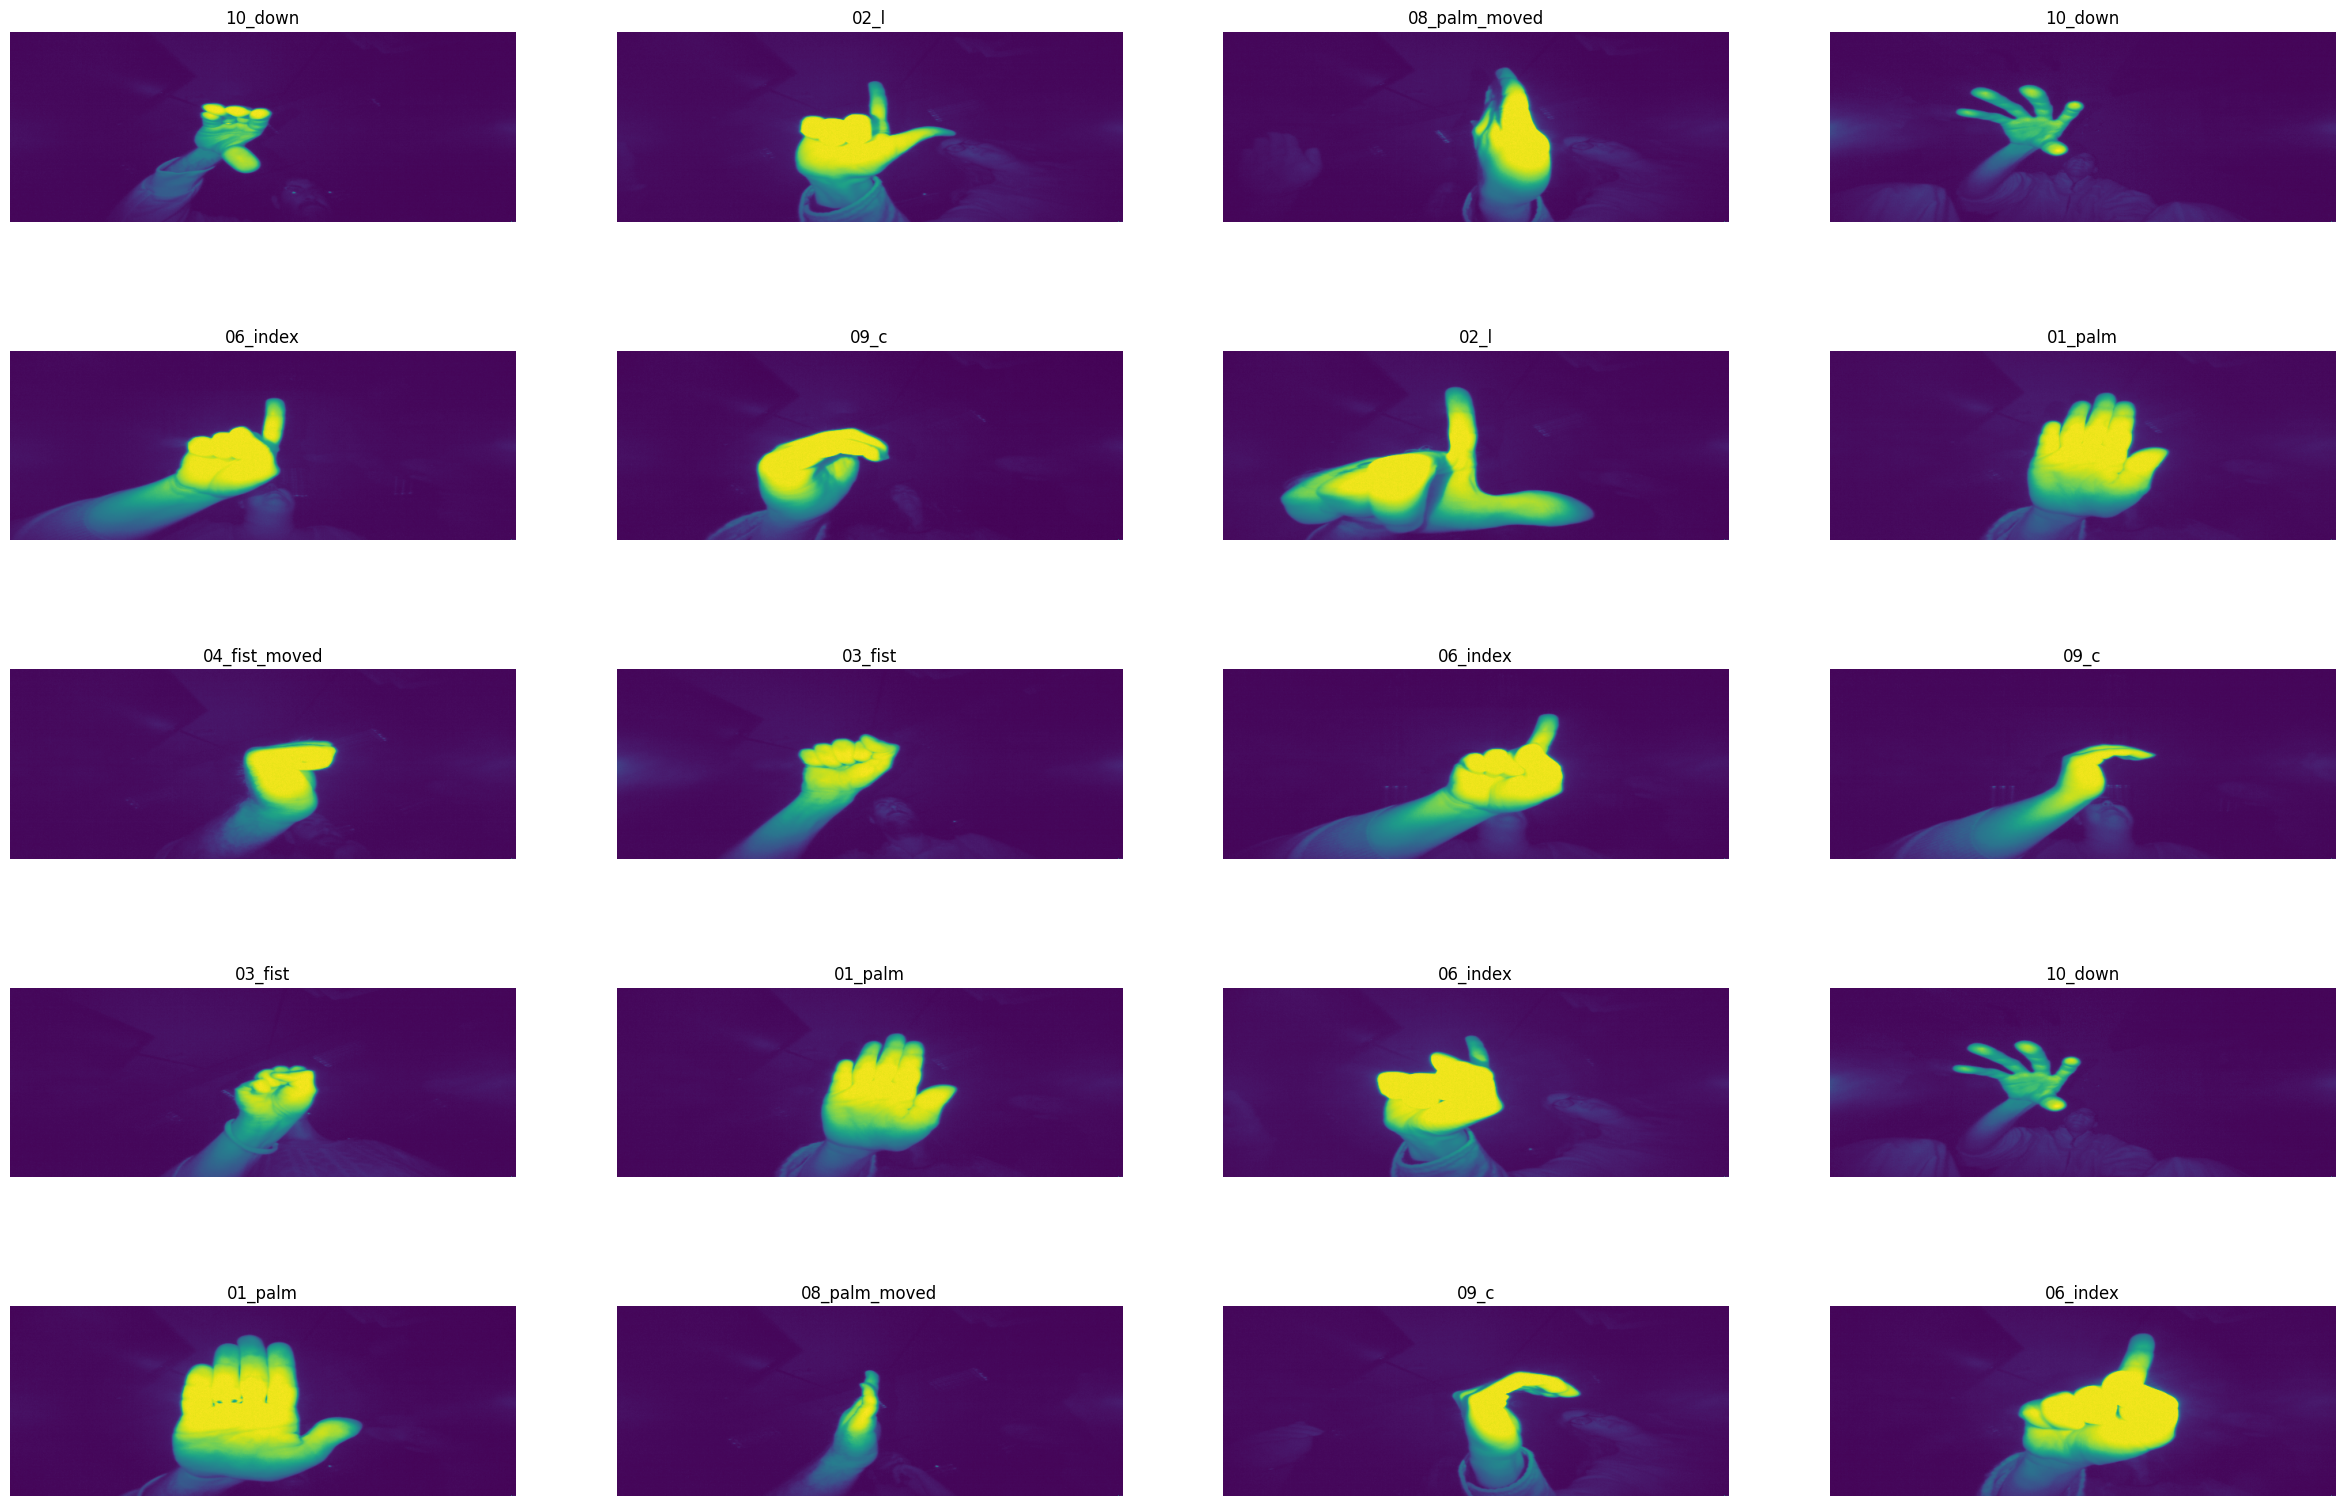

In [ ]:
#display random images with their labels
random_indices = random.sample(range(len(images)),20)
random_imges =  [images[i] for i in random_indices]
random_labels = [labels[i] for i in random_indices]
fig, axes = plt.subplots(5, 4, figsize=(30, 20 ))
axes = axes.flatten()
for idx,(img,label)  in enumerate(zip(random_imges,random_labels)):
    img=Image.open(img)
    img_array=np.array(img)
    axes[idx].imshow(img_array)
    axes[idx].set_title(label)
    axes[idx].axis('off')

plt.show()
#creat a DataFrame
df = pd.DataFrame({'images':images,'labels':labels})
# mapping the labels
le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])
x = []
y = np.array(df['labels'])
y=to_categorical(y)
# resize the images
img_size = (64, 64)
for i,img in enumerate(df['images']):
    img = Image.open(img)
    img = img.convert('RGB')
    img_resized = img.resize(img_size)
    img_array = np.array(img_resized)
    img_normalized = img_array /255.0
    x.append(img_normalized)
x = np.array(x)



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=54)

In [ ]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])



In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True,
                               verbose=1)

history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

"""
print("Summary Of The Model")
model.summary()
print("Predictions")
predictions = model.predict(x_test)
predicted_classes =  np.argmax(predictions , axis =1)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
"""


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 161s 314ms/step - accuracy: 0.4277 - loss: 1.9065 - val_accuracy: 0.7092 - val_loss: 0.8203
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 150s 301ms/step - accuracy: 0.9124 - loss: 0.2664 - val_accuracy: 0.9950 - val_loss: 0.0186
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 199s 296ms/step - accuracy: 0.9567 - loss: 0.1498 - val_accuracy: 0.9942 - val_loss: 0.0311
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 297ms/step - accuracy: 0.9770 - loss: 0.0749 - val_accuracy: 0.9977 - val_loss: 0.0099
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 204s 301ms/step - accuracy: 0.9773 - loss: 0.0861 - val_accuracy: 0.9977 - val_loss: 0.0093
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 199s 296ms/step - accuracy: 0.9806 - loss: 0.0687 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 201s 295ms/step - accuracy: 0.9858 - loss: 0.0540 - val_accuracy: 0.9967 - val_loss: 0.0161
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 208s 307ms/step - accuracy: 0.9875 -

'\nprint("Summary Of The Model")\nmodel.summary()\nprint("Predictions")\npredictions = model.predict(x_test)\npredicted_classes =  np.argmax(predictions , axis =1)\ntest_loss,test_accuracy = model.evaluate(x_test,y_test)\nprint(f"Test Loss: {test_loss}")\nprint(f"Test Accuracy: {test_accuracy}")\n'

In [ ]:
print("*MODEL SUMMARY*")
model.summary()


print("TEST RESULTS")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss     : {test_loss}")
print(f"Test Accuracy : {test_accuracy}")


print("MODEL PREDICTIONS")
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(f"Number of predicted classes : {len(np.unique(predicted_classes))}")
print(f"Number of actual classes    : {len(np.unique(true_classes))}")


print("CLASSIFICATION REPORT")
print(classification_report(true_classes, predicted_classes))


*MODEL SUMMARY*


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,923,808 (14.97 MB)

 Trainable params: 1,307,786 (4.99 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,615,574 (9.98 MB)

TEST RESULTS
Test Loss     : 0.0022790243383497
Test Accuracy : 0.999750018119812
MODEL PREDICTIONS
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step
Number of predicted classes : 10
Number of actual classes    : 10
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       427
           2       1.00      1.00      1.00       435
           3       1.00      1.00      1.00       384
           4       1.00      1.00      1.00       384
           5       1.00      1.00      1.00       382
           6       1.00      1.00      1.00       410
           7       1.00      1.00      1.00       383
           8       1.00      1.00      1.00       391
           9       1.00      1.00      1.00       397

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



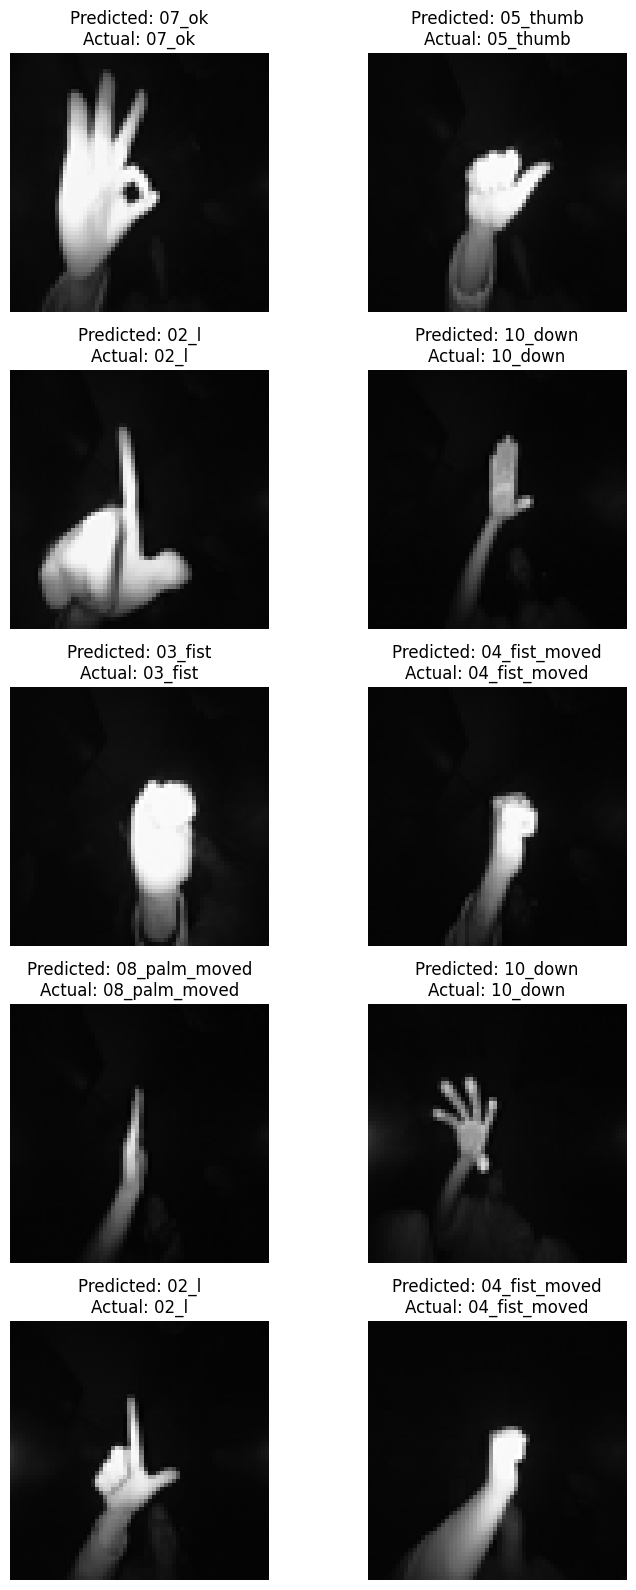

In [ ]:
random_indices = random.sample(range(len(x_test)), 10)

fig, axes = plt.subplots(5, 2, figsize=(8, 16))
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    actual_class = np.argmax(y_test[idx])
    predicted_class = predicted_classes[idx]

    actual_label = le.inverse_transform([actual_class])[0]
    predicted_label = le.inverse_transform([predicted_class])[0]

    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {predicted_label}\nActual: {actual_label}", fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

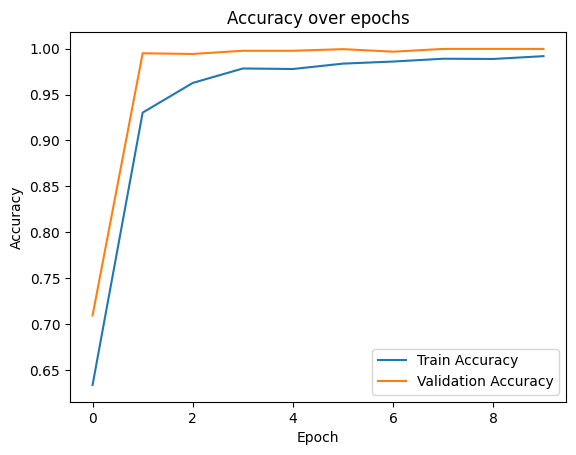

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


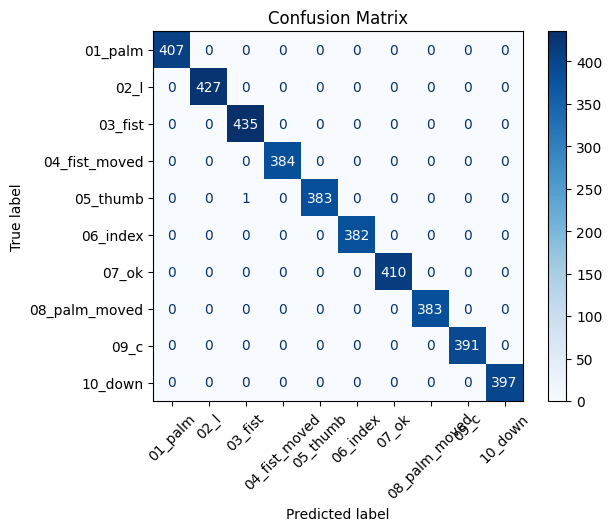

In [ ]:
y_true = np.argmax(y_test, axis=1)
y_pred = predicted_classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=le.classes_))

               precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       407
         02_l       1.00      1.00      1.00       427
      03_fist       1.00      1.00      1.00       435
04_fist_moved       1.00      1.00      1.00       384
     05_thumb       1.00      1.00      1.00       384
     06_index       1.00      1.00      1.00       382
        07_ok       1.00      1.00      1.00       410
08_palm_moved       1.00      1.00      1.00       383
         09_c       1.00      1.00      1.00       391
      10_down       1.00      1.00      1.00       397

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000

